In [10]:
import os
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
from utils import plot_chr_in_splits

DATA_DIR = '../data/gene_finding'
BED_FILE = os.path.join(DATA_DIR, 'gene_finding.bed')
H5_FILE = os.path.join(DATA_DIR, 'gene_finding.hdf5')

In [2]:
gene_df = pd.read_csv(BED_FILE, sep='\t')
gene_df

,chromosome,start,end,transcript_id,strand,flank_left,flank_right,length,split
0,chr7,142924180,142934109,ENST00000442623.1,-,614,386,9929,train
1,chr7,142939447,142941832,ENST00000409607.5,+,36,964,2385,train
2,chr7,143131185,143139848,ENST00000291009.4,+,891,109,8663,train
3,chr7,143263302,143269869,ENST00000409500.7,+,126,874,6567,test
4,chr7,143279274,143287614,ENST00000409102.5,+,682,318,8340,train
...,...,...,...,...,...,...,...,...,...
5972,chr16,56625249,56627887,ENST00000306061.10,+,225,775,2638,train
5973,chr16,56632538,56634861,ENST00000379818.4,+,120,880,2323,train
5974,chr16,56637784,56640206,ENST00000290705.12,+,881,119,2422,train
5975,chr16,56651796,56654115,ENST00000334346.3,+,89,911,2319,train


- chrom : str
    Chromosome name.
- start : int
    Start coordinate.
- end : int
    End coordinate.
- strand : str
    If strand is '-', the sequence will be reverse-complemented before returning.
- flank : int
    Number of bases to add to the start and end coordinates. The default is 0.
    Flanking regions can provide clues about the gene's function, expression patterns, and potential interactions with other genes or regulatory elements.

<Axes: xlabel='seq_len', ylabel='Count'>

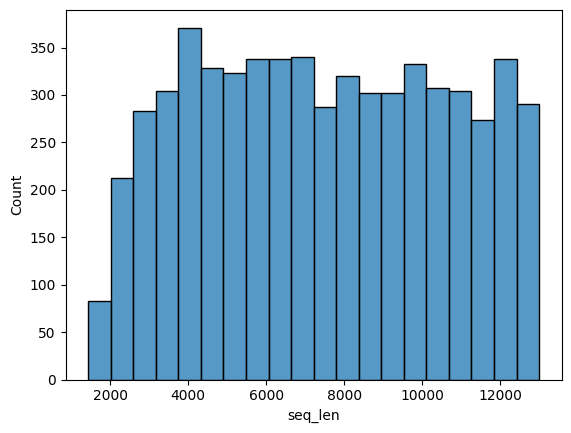

In [3]:
gene_df['seq_len'] = (gene_df['end']+gene_df['flank_right'])-(gene_df['start']-gene_df['flank_left'])  # length of each gene
gene_df['seq_len'] = (gene_df['end'])-(gene_df['start'])  # length of each gene

sns.histplot(gene_df['seq_len'])

In [4]:
gene_df['seq_len'].describe()

count     5977.000000
mean      7453.558140
std       3138.244325
min       1433.000000
25%       4760.000000
50%       7330.000000
75%      10159.000000
max      13000.000000
Name: seq_len, dtype: float64

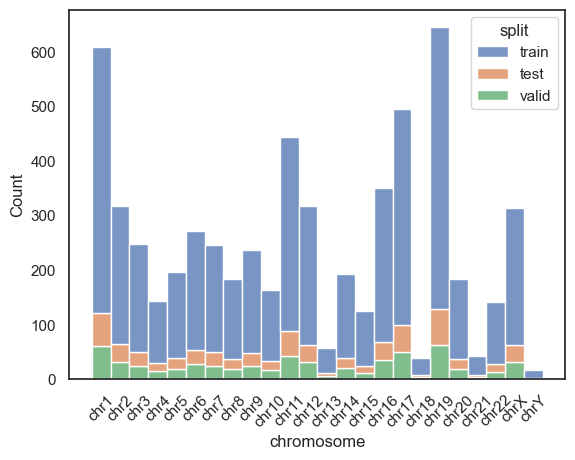

In [11]:
plot_chr_in_splits(gene_df)

In [5]:
labels_data = np.array(h5py.File(H5_FILE, 'r')['labels'])


def count_values(row):
    # Function to count values in a row
    values, counts = np.unique(row, return_counts=True)
    return dict(zip(values, counts))

vect_fun = np.vectorize(count_values)
result = vect_fun(labels_data)

# Print the result
for i, counts in enumerate(result):
    print(f"Row {i}: {counts}")

Row 0: {4.0: 1146, 5.0: 7, 6.0: 6795, 7.0: 7, 8.0: 1974}
Row 1: {0.0: 366, 1.0: 1, 2.0: 595, 3.0: 1, 8.0: 1422}
Row 2: {0.0: 438, 1.0: 3, 2.0: 7079, 3.0: 3, 8.0: 1140}
Row 3: {0.0: 642, 1.0: 6, 2.0: 4667, 3.0: 6, 8.0: 1246}
Row 4: {0.0: 648, 1.0: 1, 2.0: 219, 3.0: 1, 8.0: 7471}
Row 5: {4.0: 1080, 5.0: 6, 6.0: 4959, 7.0: 6, 8.0: 4263}
Row 6: {0.0: 1716, 1.0: 8, 2.0: 7376, 3.0: 8, 8.0: 1659}
Row 7: {0.0: 1692, 1.0: 4, 2.0: 3125, 3.0: 4, 8.0: 1574}
Row 8: {4.0: 1452, 8.0: 9299}
Row 9: {4.0: 561, 5.0: 4, 6.0: 5055, 7.0: 4, 8.0: 5490}
Row 10: {4.0: 438, 5.0: 3, 6.0: 6086, 7.0: 3, 8.0: 3508}
Row 11: {0.0: 492, 1.0: 2, 2.0: 5113, 3.0: 2, 8.0: 3113}
Row 12: {4.0: 489, 5.0: 3, 6.0: 1487, 7.0: 3, 8.0: 2319}
Row 13: {0.0: 408, 1.0: 2, 2.0: 1230, 3.0: 2, 8.0: 5126}
Row 14: {0.0: 609, 8.0: 5495}
Row 15: {0.0: 900, 8.0: 6302}
Row 16: {0.0: 1029, 1.0: 1, 2.0: 2125, 3.0: 1, 8.0: 3990}
Row 17: {4.0: 876, 5.0: 1, 6.0: 1543, 7.0: 1, 8.0: 5590}
Row 18: {0.0: 1011, 1.0: 1, 2.0: 5225, 3.0: 1, 8.0: 2698}
Row

In [6]:
labels = ['E_F','D_F','I_F','A_F','E_R','D_R','I_R','A_R','NC']

data = {}
n_samples = len(labels_data)


for idx,d in enumerate(result):
    for k, v in d.items():
        k = labels[int(k)]
        if k not in data:
            data[k] = []

        data[k].extend([0]*(idx-len(data[k])))
        data[k].append(v)

# Convert the dictionary to a DataFrame
labels_df = pd.DataFrame.from_dict(data, orient='index').T
# labels_df = labels_df.reindex(columns=labels_df.columns.sort_values())
labels_df


,E_R,D_R,I_R,A_R,NC,E_F,D_F,I_F,A_F
0,1146.0,7.0,6795.0,7.0,1974.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1422.0,366.0,1.0,595.0,1.0
2,0.0,0.0,0.0,0.0,1140.0,438.0,3.0,7079.0,3.0
3,0.0,0.0,0.0,0.0,1246.0,642.0,6.0,4667.0,6.0
4,0.0,0.0,0.0,0.0,7471.0,648.0,1.0,219.0,1.0
...,...,...,...,...,...,...,...,...,...
5972,NaN,NaN,NaN,NaN,1521.0,183.0,2.0,930.0,2.0
5973,NaN,NaN,NaN,NaN,1215.0,183.0,2.0,921.0,2.0
5974,NaN,NaN,NaN,NaN,1213.0,183.0,2.0,1022.0,2.0
5975,NaN,NaN,NaN,NaN,1210.0,183.0,2.0,922.0,2.0


In [7]:
# check if the number of labels in each row matches the length of the gene
seq_len = labels_df.sum(axis=1)
(seq_len == gene_df['seq_len'].values).all()

labels_df_normalised = labels_df.div(seq_len, axis=0)
labels_df_normalised.fillna(0, inplace=True)
labels_df_normalised

,E_R,D_R,I_R,A_R,NC,E_F,D_F,I_F,A_F
0,0.115419,0.000705,0.684359,0.000705,0.198812,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.596226,0.153459,0.000419,0.249476,0.000419
2,0.000000,0.000000,0.000000,0.000000,0.131594,0.050560,0.000346,0.817153,0.000346
3,0.000000,0.000000,0.000000,0.000000,0.189737,0.097762,0.000914,0.710675,0.000914
4,0.000000,0.000000,0.000000,0.000000,0.895803,0.077698,0.000120,0.026259,0.000120
...,...,...,...,...,...,...,...,...,...
5972,0.000000,0.000000,0.000000,0.000000,0.576573,0.069371,0.000758,0.352540,0.000758
5973,0.000000,0.000000,0.000000,0.000000,0.523031,0.078777,0.000861,0.396470,0.000861
5974,0.000000,0.000000,0.000000,0.000000,0.500826,0.075557,0.000826,0.421965,0.000826
5975,0.000000,0.000000,0.000000,0.000000,0.521777,0.078913,0.000862,0.397585,0.000862


/Users/dgreco2/miniconda3/envs/bend/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/dgreco2/miniconda3/envs/bend/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


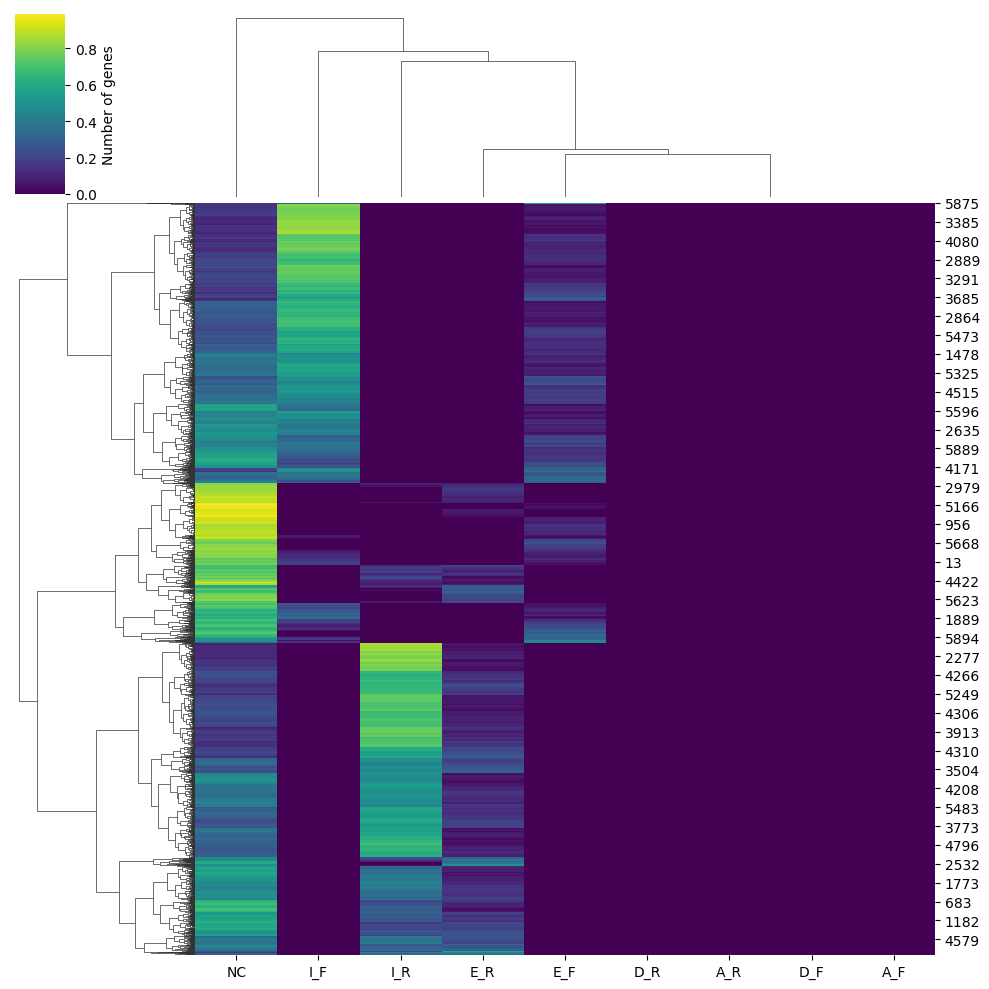

In [8]:
sns.clustermap(labels_df_normalised, figsize=(10, 10), cmap='viridis', cbar_kws={'label': 'Number of genes'})